# Zorluk: Veri Bilimi Hakkında Metin Analizi

Bu örnekte, geleneksel bir veri bilimi sürecinin tüm adımlarını kapsayan basit bir alıştırma yapacağız. Herhangi bir kod yazmanıza gerek yok, sadece aşağıdaki hücrelere tıklayarak onları çalıştırabilir ve sonucu gözlemleyebilirsiniz. Bir zorluk olarak, bu kodu farklı verilerle denemeniz teşvik edilmektedir.

## Amaç

Bu derste, Veri Bilimi ile ilgili farklı kavramları tartıştık. Şimdi, **metin madenciliği** yaparak daha fazla ilgili kavram keşfetmeye çalışalım. Veri Bilimi hakkında bir metinle başlayacağız, bu metinden anahtar kelimeleri çıkaracağız ve ardından sonucu görselleştirmeye çalışacağız.

Metin olarak, Wikipedia'daki Veri Bilimi sayfasını kullanacağım:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Adım 1: Veriyi Alma

Her veri bilimi sürecindeki ilk adım, veriyi almaktır. Bunu yapmak için `requests` kütüphanesini kullanacağız:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Adım 2: Veriyi Dönüştürme

Bir sonraki adım, veriyi işleme için uygun bir forma dönüştürmektir. Bizim durumumuzda, sayfadan HTML kaynak kodunu indirdik ve bunu düz metne çevirmemiz gerekiyor.

Bunun yapılabileceği birçok yöntem vardır. Python'un yerleşik [HTMLParser](https://docs.python.org/3/library/html.parser.html) nesnesini kullanacağız. `HTMLParser` sınıfını alt sınıf olarak tanımlayıp, `<script>` ve `<style>` etiketleri hariç HTML etiketlerinin içindeki tüm metni toplayacak kodu yazmamız gerekiyor.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Adım 3: İçgörüler Elde Etme

En önemli adım, verilerimizi içgörüler çıkarabileceğimiz bir forma dönüştürmektir. Bizim durumumuzda, metinden anahtar kelimeleri çıkarmak ve hangi anahtar kelimelerin daha anlamlı olduğunu görmek istiyoruz.

Anahtar kelime çıkarımı için [RAKE](https://github.com/aneesha/RAKE) adlı bir Python kütüphanesi kullanacağız. Öncelikle, bu kütüphane yüklü değilse yükleyelim:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Ana işlevsellik, bazı parametreler kullanarak özelleştirebileceğimiz `Rake` nesnesinden sağlanır. Bizim durumumuzda, bir anahtar kelimenin minimum uzunluğunu 5 karakter, bir anahtar kelimenin belgede minimum sıklığını 3 ve bir anahtar kelimedeki maksimum kelime sayısını 2 olarak ayarlayacağız. Diğer değerlerle oynamaktan çekinmeyin ve sonucu gözlemleyin.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Önem derecesiyle birlikte bir terimler listesi elde ettik. Gördüğünüz gibi, makine öğrenimi ve büyük veri gibi en ilgili disiplinler listenin üst sıralarında yer alıyor.

## Adım 4: Sonucu Görselleştirme

İnsanlar veriyi en iyi görsel biçimde yorumlayabilir. Bu nedenle, bazı içgörüler elde etmek için veriyi görselleştirmek genellikle mantıklıdır. Python'da `matplotlib` kütüphanesini kullanarak anahtar kelimelerin önem derecesiyle basit bir dağılımını çizebiliriz:


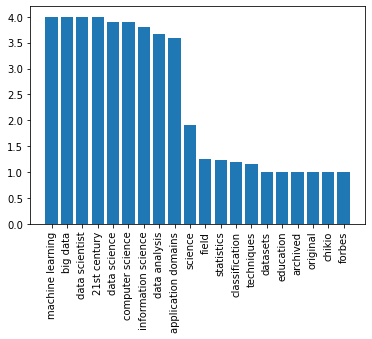

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Bununla birlikte, kelime frekanslarını görselleştirmenin daha iyi bir yolu vardır - **Kelime Bulutu** kullanmak. Anahtar kelime listemizden kelime bulutunu çizmek için başka bir kütüphane yüklememiz gerekecek.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` nesnesi, ya orijinal metni ya da önceden hesaplanmış kelimeler ve frekanslarının bir listesini alıp, ardından `matplotlib` kullanılarak görüntülenebilecek bir resim döndürmekten sorumludur:


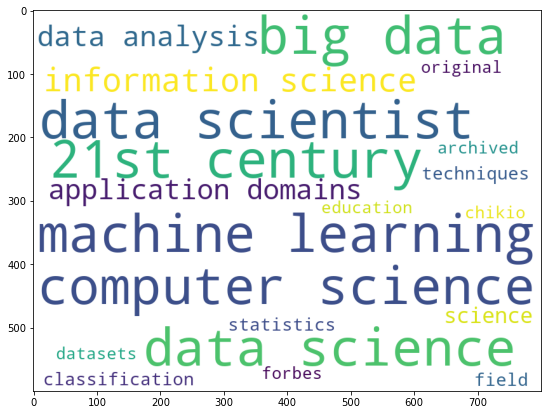

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Orijinal metni de `WordCloud`'a geçirebiliriz - benzer bir sonuç elde edip edemeyeceğimize bakalım:


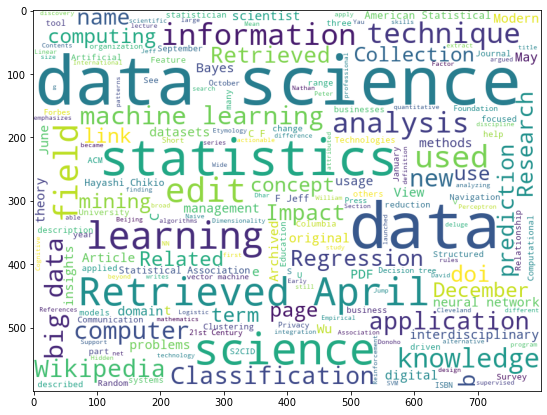

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Kelime bulutu artık daha etkileyici görünüyor, ancak aynı zamanda çok fazla gürültü içeriyor (örneğin, `Retrieved on` gibi alakasız kelimeler). Ayrıca, *data scientist* veya *computer science* gibi iki kelimeden oluşan anahtar kelimeleri daha az elde ediyoruz. Bunun nedeni, RAKE algoritmasının metinden iyi anahtar kelimeler seçme konusunda çok daha iyi bir iş çıkarmasıdır. Bu örnek, veri ön işleme ve temizlemenin önemini göstermektedir, çünkü sonunda net bir tablo elde etmek daha iyi kararlar almamızı sağlayacaktır.

Bu alıştırmada, Wikipedia metninden anahtar kelimeler ve kelime bulutu şeklinde bir anlam çıkarma sürecini basit bir şekilde ele aldık. Bu örnek oldukça basit, ancak bir veri bilimcinin veri ile çalışırken izlediği tipik adımları iyi bir şekilde göstermektedir; veri ediniminden görselleştirmeye kadar.

Kursumuzda bu adımların hepsini detaylı bir şekilde tartışacağız.



---

**Feragatname**:  
Bu belge, [Co-op Translator](https://github.com/Azure/co-op-translator) adlı yapay zeka çeviri hizmeti kullanılarak çevrilmiştir. Doğruluk için çaba göstersek de, otomatik çevirilerin hata veya yanlışlıklar içerebileceğini lütfen unutmayın. Orijinal belgenin kendi dilindeki hali, yetkili kaynak olarak kabul edilmelidir. Kritik bilgiler için profesyonel insan çevirisi önerilir. Bu çevirinin kullanımından kaynaklanan herhangi bir yanlış anlama veya yanlış yorumlama durumunda sorumluluk kabul edilmez.
